In [24]:
import optimistix as optx
import jax.numpy as jnp
from jax import jvp, grad, jacobian, value_and_grad 
import optax
import matplotlib.pyplot as plt

In [30]:
def inner_objective(w, args):
    _, theta = args
    return (w-theta**2)**2

def outer_objective(w_opt):
    return 2 * w_opt

grad_outer = grad(outer_objective)
grad_inner = grad(inner_objective)

def solve_inner(theta, args): # todo - try optimistix solver?
    w_init = args
    optim = optx.BFGS(rtol=1e-8, atol=1e-8)
    w_opt = optx.minimise(inner_objective, optim, y0=w_init, args=(None, theta)).value
    return w_opt

def score(theta, args):
    w_init = args # initial weight
    w_opt = solve_inner(theta, w_init)
    print(theta, w_opt)
    return outer_objective(w_opt)

In [35]:
value_and_grad(solve_inner)(0.1, 0.1)

(Array(0.01, dtype=float32), Array(0.2, dtype=float32, weak_type=True))

-10.0 100.0
-9.0 81.0
-8.0 64.0
-7.0 49.0
-6.0 36.0
-5.0 25.0
-4.0 16.0
-3.0 9.0
-2.0 4.0
-1.0 1.0
0.0 0.0
1.0 1.0
2.0 4.0
3.0 9.0
4.0 16.0
5.0 25.0
6.0 36.0
7.0 49.0
8.0 64.0
9.0 81.0
10.0 100.0


Text(0, 0.5, 'val(theta)')

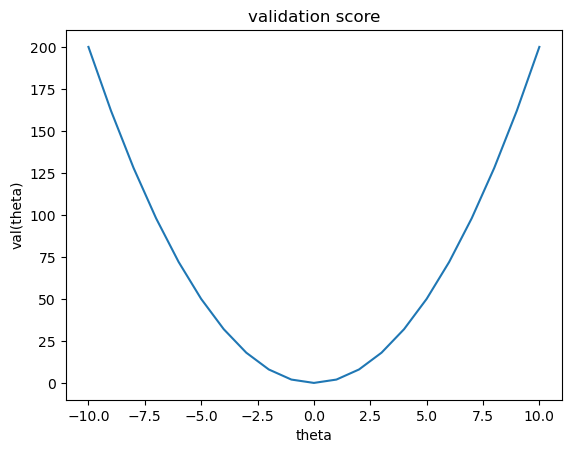

In [5]:
xs = jnp.arange(-10, 10.1, 1)
ys = [score(float(x), 0.0) for x in xs]
plt.plot(xs, ys)
plt.title("validation score")
plt.xlabel("theta")
plt.ylabel("val(theta)")

In [7]:
def solve_outer(theta_init, w_init):
    optim = optx.BFGS(rtol=1, atol=1)
    sol = optx.minimise(score, optim, y0=theta_init, args=w_init)
    return sol.value

solve_outer(4.0, 0.0) # finds optimal theta, uses implicit diff?

Array(0., dtype=float32)